# ECE NLP Project 

### By: Jae Yun

Using MultinomialNB and Naive Bayes to Make predictions on whether a disaster tweet is real or fake using the sklearn library

#**<font color='teal'>Data Setup</font>**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown --id 15Vh-MTZAhWWTxVccW0smvJvpy8x5rNPa
!gdown --id 1F3pOCy0adnt6yadk0CP3FVmYJDNdt7QQ
!gdown --id 1_J3SyLijON45Zpf-SsfWVBY2ODRE1emw


/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15Vh-MTZAhWWTxVccW0smvJvpy8x5rNPa
To: /content/test.csv
100% 421k/421k [00:00<00:00, 86.3MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1F3pOCy0adnt6yadk0CP3FVmYJDNdt7QQ
To: /content/train.csv
100% 988k/988k [00:00<00:00, 116MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_J3SyLij

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Added a column for both train and test dataframes to find the length of each text.

train['length'] = train['text'].apply(len)
test['length'] = test['text'].apply(len)

print(train.head())
print(train.length.describe(), '\n') #Statistics of length of each text
print(test.length.describe())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  length  
0       1      69  
1       1      38  
2       1     133  
3       1      65  
4       1      88  
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64 

count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: length, dtype: float64


#**<font color='teal'>Some Data Visualizations</font>**


<Axes: xlabel='target', ylabel='count'>

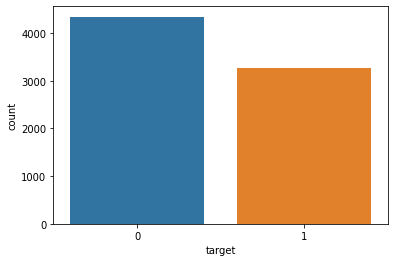

In [ ]:
sns.countplot(data = train, x = 'target')

#This data shows the number of fake tweets (0) and real tweets (1) (Around 57% are fake, 43% real)

<Axes: xlabel='target', ylabel='length'>

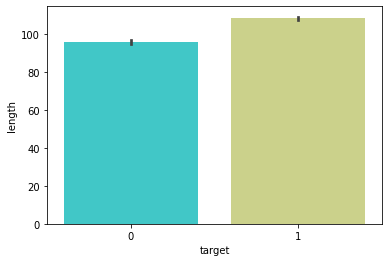

In [ ]:
sns.barplot(x='target', y = train.length, data=train, palette='rainbow')
#Some data analysis: real tweets tend to have longer length tweets.

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

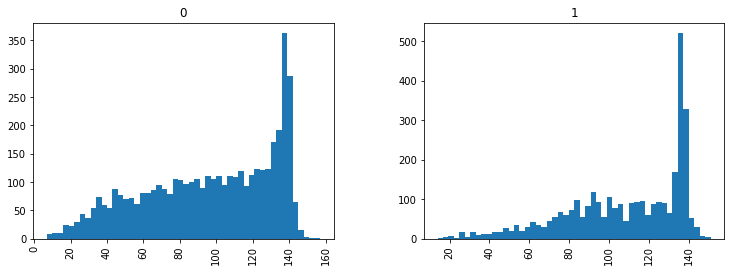

In [ ]:
train.hist(column='length', by='target', bins=50,figsize=(12,4))

#Majority of the tweets range from 130-145 words in length. Way more real tweets are in the 130-140 range than the fake tweets.

#**<font color='teal'>Data Cleaning</font>**


In [ ]:
#Not using this code atm but made it just in case: 
#This block turns the text in the train dataframe into one entire string

train_fulltext = ''
for value in train.text:
    train_fulltext = train_fulltext + ' ' + value
print(train_fulltext[:500])

 Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #


In [ ]:
#Using this to clean data in the next block

import string
import spacy

en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words
print(stopwords)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


{'were', 'then', '‘m', 'sometime', 'rather', 'beyond', 'n’t', 'noone', 'still', 'serious', 'an', 'few', 'what', 'we', 'used', 'those', 'formerly', 'over', 'using', 'all', 'almost', 'also', 'been', 'another', '’ve', 'say', 'own', 'towards', 'enough', 'when', 'whereas', 'did', 'each', 'indeed', 'really', 'please', 'if', 'whose', 'amount', "'m", 'seem', 'who', 'everyone', 'ourselves', 'am', 'nothing', 'unless', 'per', 'beside', 'nowhere', 'regarding', 'made', 'much', 'thru', 'name', 'twenty', 'always', '’s', 'throughout', 'perhaps', '’re', 'has', 'within', 'along', 'either', 'whenever', 'otherwise', 'your', 'wherein', 'during', 'above', 'eleven', 'fifteen', 'top', 'side', 'moreover', '’d', 'whereby', 'had', 'last', 'everything', 'whether', 'something', 'under', 'besides', 'three', 'these', 'between', 'not', 'became', 'same', 'make', 'hundred', 'seems', 'except', 'below', 'they', 'from', 'may', "n't", 'his', 'anyway', "'ll", 'show', 'or', 'doing', 'will', 'now', 'herself', 'mine', 'sixty',

In [ ]:
#This block is to clean data (remove punctuation and stop words since they're considered meaningless (according to my udemy lesson))
#This might interfere with our dataset since some stopwords/punctuation may be useful in determining whether a tweet is fake or not.
#But, let's worry about optimization after we make the basic nlp model.


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords]

In [ ]:
train.text[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
text_process(train.text[0])

['Deeds', 'Reason', 'earthquake', 'ALLAH', 'Forgive']

In [ ]:
#Applied text_process to the entire train and test dataset
train['cleaned_text'] = train['text'].apply(text_process)
test['cleaned_text'] = test['text'].apply(text_process)

In [ ]:
train.head()

,id,keyword,location,text,target,length,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,"[Deeds, Reason, earthquake, ALLAH, Forgive]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


#**<font color='teal'>Vectorization and TFIDF</font>**


In [ ]:
X_train_flat = [' '.join(sublist) for sublist in train['cleaned_text']]

# extract the unique words from the training data
words = set()
for sentence in X_train_flat:
    for word in sentence.split():
        words.add(word)
vocab = list(words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary = vocab)
train_bow = vectorizer.fit_transform(train['text'])


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(train_bow)
train_tfidf = tfidf_transformer.transform(train_bow)

#**<font color='teal'>Train Test Split</font>**


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, train['target'], test_size = 0.3, random_state = 101)

#**<font color='teal'>MultinomialNB</font>**


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
fake_detect_model = MultinomialNB().fit(X_train, y_train)

In [ ]:
all_predictions = fake_detect_model.predict(X_test)
print(all_predictions)

[0 1 0 ... 1 0 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(all_predictions, y_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1529
           1       0.64      0.81      0.72       755

    accuracy                           0.79      2284
   macro avg       0.77      0.80      0.78      2284
weighted avg       0.81      0.79      0.80      2284



#**<font color='teal'>Bernoulli Naive Bayes</font>**


In [ ]:
from sklearn.naive_bayes import BernoulliNB

fake_detect_model = BernoulliNB().fit(X_train, y_train)
all_predictions = fake_detect_model.predict(X_test)
print(classification_report(all_predictions, y_test))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1666
           1       0.57      0.88      0.69       618

    accuracy                           0.79      2284
   macro avg       0.76      0.82      0.77      2284
weighted avg       0.84      0.79      0.80      2284



#**<font color='teal'>Linear Support Vector Machine</font>**


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)

sgd = sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


accuracy 0.7648861646234676


#**<font color='teal'>Showing test tweets and their prediction</font>**


In [ ]:
test_vectorized = vectorizer.transform(test['text'])
test_tfidf = tfidf_transformer.transform(test_vectorized)
final_pred = fake_detect_model.predict(test_tfidf)

In [ ]:
for i in range(100):
    print(test['text'][i], final_pred[i])

Just happened a terrible car crash 0
Heard about #earthquake is different cities, stay safe everyone. 0
there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all 1
Apocalypse lighting. #Spokane #wildfires 0
Typhoon Soudelor kills 28 in China and Taiwan 1
We're shaking...It's an earthquake 0
They'd probably still show more life than Arsenal did yesterday, eh? EH? 0
Hey! How are you? 0
What a nice hat? 0
Fuck off! 0
No I don't like cold! 0
NOOOOOOOOO! Don't do that! 0
No don't tell me that! 0
What if?! 0
Awesome! 0
Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU 1
@sunkxssedharry will you wear shorts for race ablaze ? 0
#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI 1
Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw 0
PSA: IÛªm splitting my personali

#### Conclusion:

In our case, 1 means real and 0 means fake. Looking at our test set predictions, we can see that our model worked pretty well in determining whether a tweet was talking about a disaster.